In [12]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('datasets/data_set_completo_1.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          946 non-null    object 
 1   author         946 non-null    object 
 2   price          944 non-null    float64
 3   pages          934 non-null    float64
 4   avg_reviews    946 non-null    float64
 5   n_reviews      946 non-null    int64  
 6   star5          946 non-null    float64
 7   star4          946 non-null    float64
 8   star3          946 non-null    float64
 9   star2          946 non-null    float64
 10  star1          946 non-null    float64
 11  dimensions     914 non-null    object 
 12  weight         943 non-null    object 
 13  language       943 non-null    object 
 14  publisher      942 non-null    object 
 15  ISBN_13        945 non-null    object 
 16  link           946 non-null    object 
 17  complete_link  946 non-null    object 
dtypes: float64

#### Primeira etapa dessa análise será a criação de conjuntos com o método TF-IDF
- https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
- será criado conjuntos dos principais temas com base ponderada na variável 'title'

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words = 'english', ngram_range = (1,2))

X = vectorizer.fit_transform(df['title'])

In [8]:
pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

,001,10,10 machine,100,100 essential,100 recipes,100 solved,101,101 data,1098,...,youll likely,young,young children,youtube,youâ,youâ new,zed,zed shaws,²s,²s statistics
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
942,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
943,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
K = range(2,10)

In [10]:
from sklearn.cluster import KMeans

sum_of_squared_distances= []
for k in K:
    km = KMeans(n_clusters=k, max_iter=600, n_init=10)
    km.fit(X)
    sum_of_squared_distances.append(km.inertia_)

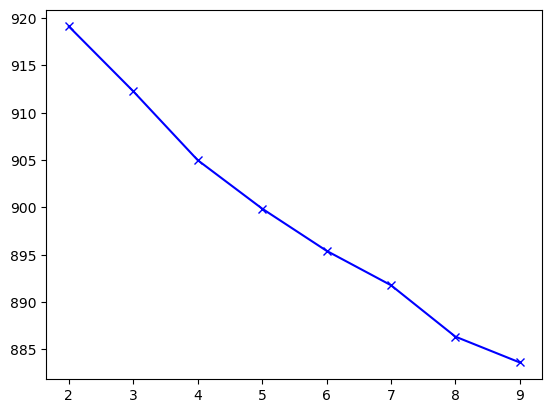

In [13]:
plt.plot(K,sum_of_squared_distances, 'bx-')
plt.show()

- get clusters

In [14]:
true_k = 6
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=600, n_init=10)
model.fit(X)

# Obtendo as previsões
book_cl = pd.DataFrame(list(zip(df['title'], model.labels_)), columns=['title', 'cluster'])
book_cl.sort_values(by=['cluster'])

,title,cluster
945,Psychology Statistics For Dummies,0
848,Statistics for People Who (Think They) Hate St...,0
849,Statistics for the Behavioral Sciences - Stand...,0
850,Statistics for Business and Economics,0
852,Applied Statistics II: Multivariable and Multi...,0
...,...,...
510,Deep Learning In Biology And Medicine,5
432,Deep Learning for NLP and Speech Recognition,5
477,Learning Unix for OS X: Going Deep With the Te...,5
436,Guide to Deep Learning Basics: Logical Histori...,5


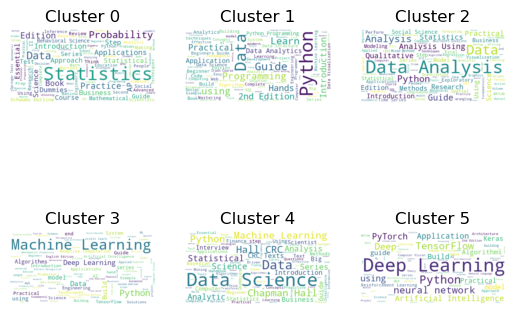

In [15]:
# Create wordclouds for clusters
from wordcloud import WordCloud

for k in range(true_k):
   text = book_cl[book_cl.cluster == k]['title'].str.cat(sep=' ')
   wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

   # Create subplot
   plt.subplot(2, 3, k+1).set_title("Cluster " + str(k)) 
   plt.plot()
   plt.imshow(wordcloud, interpolation="bilinear")
   plt.axis("off")
plt.show()

- Statistics
- Python
- Data Analysis
- Machine Learn
- Data Science
- Deep Learn

---

#### Listas dos livros melhor avaliados de cada tópico

In [25]:
best_python_books.columns

Index(['title', 'author', 'price', 'pages', 'avg_reviews', 'n_reviews',
       'star5', 'star4', 'star3', 'star2', 'star1', 'dimensions', 'weight',
       'language', 'publisher', 'ISBN_13', 'link', 'complete_link'],
      dtype='object')

In [32]:
# python
python_books = df[df['title'].str.contains('Python')]
best_python_books = python_books.nlargest(20, ['n_reviews', 'avg_reviews'])
best_python_books = best_python_books[['title', 'author', 'price', 'pages', 'n_reviews', 'avg_reviews', ]]
best_python_books.to_csv('best_python_books.csv', index = False)

In [34]:
# Statistics
Statistics_books = df[df['title'].str.contains('Statistics')]
best_Statistics_books = Statistics_books.nlargest(20, ['n_reviews', 'avg_reviews'])
best_Statistics_books = best_Statistics_books[['title', 'author', 'price', 'pages', 'n_reviews', 'avg_reviews', ]]
best_Statistics_books.to_csv('Best_Statistics_books.csv', index = False)

In [37]:
# Data Analysis
Data_Analysis_books = df[df['title'].str.contains('Data_Analysis')]
best_Data_Analysis_books = Data_Analysis_books.nlargest(20, ['n_reviews', 'avg_reviews'])
best_Data_Analysis_books = best_Statistics_books[['title', 'author', 'price', 'pages', 'n_reviews', 'avg_reviews', ]]
best_Data_Analysis_books.to_csv('Best_Data_Analysis_books.csv', index = False)

In [40]:
# Machine_Learn
Machine_Learn_books = df[df['title'].str.contains('Machine Learn')]
Machine_Learn_books = Machine_Learn_books.nlargest(20, ['n_reviews', 'avg_reviews'])
Machine_Learn_books = Machine_Learn_books[['title', 'author', 'price', 'pages', 'n_reviews', 'avg_reviews', ]]
Machine_Learn_books.to_csv('Best_Machine_Learn_books.csv', index = False)

In [41]:
# Data_Science
Data_Science_books = df[df['title'].str.contains('Data Science')]
Data_Science_books = Data_Science_books.nlargest(20, ['n_reviews', 'avg_reviews'])
Data_Science_books = Data_Science_books[['title', 'author', 'price', 'pages', 'n_reviews', 'avg_reviews', ]]
Data_Science_books.to_csv('Best_Data_Science_books.csv', index = False)

In [42]:
# Deep_Learn
Deep_Learn_books = df[df['title'].str.contains('Deep Learn')]
Deep_Learn_books = Deep_Learn_books.nlargest(20, ['n_reviews', 'avg_reviews'])
Deep_Learn_books = Deep_Learn_books[['title', 'author', 'price', 'pages', 'n_reviews', 'avg_reviews', ]]
Deep_Learn_books.to_csv('Best_Deep_Learn_books.csv', index = False)